In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
input_file = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting"
companies_list = os.listdir(input_file)

In [ ]:
# categories = []
# for company in companies_list:
#     file_path = os.path.join(input_file, company, "Pruned_Excel", "Final_Parameters")    
#     # Define the specific file once
#     excel_file = os.path.join(file_path, f"{company}_Cleaned_Data_Updated.xlsx")
    
#     # Check if the file exists before reading
#     if os.path.exists(excel_file):
#         dfs = pd.read_excel(excel_file, sheet_name=None)
#         # print(company, dfs.keys())  # Run only once per company
#         keys = list(dfs.keys())
        
#         for key in keys:
#             print(key)
#             df = dfs.get(key)
            
#             if isinstance(df, pd.DataFrame):
#                 categories.append(dfs.get(key))
                
#         for df in categories:
#             df.replace(np.nan,0)
    

_IncompleteInputError: incomplete input (1492227444.py, line 24)

In [1]:
import os
import pandas as pd
import numpy as np

input_file = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting"
companies_list = os.listdir(input_file)

# Month to Quarter Mapping
month_to_quarter = {'Jun': 'Q1', 'Sep': 'Q2', 'Dec': 'Q3', 'Mar': 'Q4'}

for company in companies_list:
    file_path = os.path.join(input_file, company, "Pruned_Excel", "Final_Parameters")
    os.makedirs(os.path.join(file_path, "Semi_Final"), exist_ok=True)

    # Define file names
    excel_file = os.path.join(file_path, f"{company}_Cleaned_Data_Updated.xlsx")
    semi_final_file = os.path.join(file_path, "Semi_Final", f"{company}_Semi_Final.xlsx")

    # Check if the file exists before reading
    if os.path.exists(excel_file):
        dfs = pd.read_excel(excel_file, sheet_name=None)  # Read all sheets
        processed_data = {}  # Store DataFrames with sheet names

        for sheet_name, df in dfs.items():
            if isinstance(df, pd.DataFrame):
                if sheet_name == "Quarterly":
                    print(f"Sorting & Formatting: {sheet_name}")

                    # Convert 'Date' column to proper datetime format
                    df.iloc[:, 0] = df.iloc[:, 0].astype(str).str.replace("'", "")  # Remove apostrophe
                    df['Year'] = df.iloc[:, 0].str[-2:].apply(lambda x: '20' + x if int(x) <= 30 else '19' + x)
                    df['Month'] = df.iloc[:, 0].str[:3]  # Extract Month
                    df['Date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'], format='%b %Y')

                    # Sort DataFrame by Date
                    df = df.sort_values(by='Date').drop(columns=['Year', 'Month'])

                    # Add Quarter Column
                    df['Quarter'] = df.iloc[:, 0].str[:3].map(month_to_quarter)

                    # Store processed Quarterly Data
                    processed_data[sheet_name] = df
                else:
                    df.fillna(0, inplace=True)  # Replace NaN with 0
                    processed_data[sheet_name] = df  # Store DataFrame

        # Save all processed DataFrames into one Excel file
        with pd.ExcelWriter(semi_final_file, engine="xlsxwriter") as writer:
            for sheet_name, df in processed_data.items():
                df.to_excel(writer, sheet_name=sheet_name, index=False)

        print(f"Saved: {semi_final_file}")


Sorting & Formatting: Quarterly
Saved: C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting\3i Infotech Ltd\Pruned_Excel\Final_Parameters\Semi_Final\3i Infotech Ltd_Semi_Final.xlsx
Sorting & Formatting: Quarterly
Saved: C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting\Adroit Infotech Ltd\Pruned_Excel\Final_Parameters\Semi_Final\Adroit Infotech Ltd_Semi_Final.xlsx
Sorting & Formatting: Quarterly
Saved: C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting\Affle India Ltd\Pruned_Excel\Final_Parameters\Semi_Final\Affle India Ltd_Semi_Final.xlsx
Sorting & Formatting: Quarterly
Saved: C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting\AION-TECH SOLUTIONS Ltd\Prune

In [2]:
import os
import pandas as pd
import numpy as np

input_file = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting"
companies_list = os.listdir(input_file)

# Month to Quarter Mapping
month_to_quarter = {'Mar': 'Q4', 'Jun': 'Q1', 'Sep': 'Q2', 'Dec': 'Q3'}

for company in companies_list:
    file_path = os.path.join(input_file, company, "Pruned_Excel", "Final_Parameters")
    os.makedirs(os.path.join(file_path, "Semi_Final"), exist_ok=True)

    # Define file names
    excel_file = os.path.join(file_path, f"{company}_Cleaned_Data_Updated.xlsx")
    semi_final_file = os.path.join(file_path, "Semi_Final", f"{company}_Semi_Final.xlsx")

    # Check if the file exists before reading
    if os.path.exists(excel_file):
        dfs = pd.read_excel(excel_file, sheet_name=None)  # Read all sheets
        processed_data = {}  # Store DataFrames with sheet names

        for sheet_name, df in dfs.items():
            if isinstance(df, pd.DataFrame):
                if sheet_name == "Quarterly":
                    print(f"Processing: {sheet_name}")

                    # Convert 'Date' column to string and remove apostrophes
                    df.iloc[:, 0] = df.iloc[:, 0].astype(str).str.replace("'", "")
                    
                    # Extract Month and Year
                    df['Month'] = df.iloc[:, 0].str[:3]
                    df['Year'] = df.iloc[:, 0].str[-2:].apply(lambda x: '20' + x if int(x) <= 30 else '19' + x)
                    
                    # Create a sortable date column
                    df['SortableDate'] = pd.to_datetime(df['Month'] + ' ' + df['Year'], format='%b %Y')
                    
                    # Sort DataFrame by SortableDate
                    df = df.sort_values(by='SortableDate').drop(columns=['SortableDate'])
                    
                    # Map to Quarter
                    df['Quarter'] = df['Month'].map(month_to_quarter)
                    
                    # Append Quarter info to the 0th column
                    df.iloc[:, 0] = df.iloc[:, 0] + ' ' + df['Quarter']
                    
                    # Drop unnecessary columns
                    df = df.drop(columns=['Month', 'Year', 'Quarter'])
                    
                    # Store processed Quarterly Data
                    processed_data[sheet_name] = df
                else:
                    df.fillna(0, inplace=True)  # Replace NaN with 0
                    processed_data[sheet_name] = df  # Store DataFrame

        # Save all processed DataFrames into one Excel file
        with pd.ExcelWriter(semi_final_file, engine="xlsxwriter") as writer:
            for sheet_name, df in processed_data.items():
                df.to_excel(writer, sheet_name=sheet_name, index=False)

        print(f"Saved: {semi_final_file}")


Processing: Quarterly
Saved: C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting\3i Infotech Ltd\Pruned_Excel\Final_Parameters\Semi_Final\3i Infotech Ltd_Semi_Final.xlsx
Processing: Quarterly
Saved: C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting\Adroit Infotech Ltd\Pruned_Excel\Final_Parameters\Semi_Final\Adroit Infotech Ltd_Semi_Final.xlsx
Processing: Quarterly
Saved: C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting\Affle India Ltd\Pruned_Excel\Final_Parameters\Semi_Final\Affle India Ltd_Semi_Final.xlsx
Processing: Quarterly
Saved: C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting\AION-TECH SOLUTIONS Ltd\Pruned_Excel\Final_Parameters\Semi_Final\AION

In [ ]:
import os
import pandas as pd

input_file = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting"
companies_list = os.listdir(input_file)

for company in companies_list:
    file_path = os.path.join(input_file, company, "Pruned_Excel", "Final_Parameters")

    # Define file names
    excel_file = os.path.join(file_path, f"{company}_Cleaned_Data_Updated.xlsx")
    semi_final_file = os.path.join(file_path, "Semi_Final", f"{company}_Semi_Final.xlsx")

    # Check if the file exists before reading
    if os.path.exists(excel_file):
        dfs = pd.read_excel(excel_file, sheet_name=None)  # Read all sheets
        processed_data = {}  # Store DataFrames with sheet names

        for sheet_name, df in dfs.items():
            if isinstance(df, pd.DataFrame):
                if sheet_name == "Quarterly":
                    print(f"Processing: {company} - {sheet_name}")

                    # Fill NaN values with 0
                    df = df.fillna(0)  # Explicit assignment

                processed_data[sheet_name] = df  # Store modified DataFrame

        # Save the updated data back to an Excel file
        with pd.ExcelWriter(semi_final_file, engine='xlsxwriter') as writer:
            for sheet, data in processed_data.items():
                data.to_excel(writer, sheet_name=sheet, index=False)

        print(f"Saved: {semi_final_file}")


In [ ]:
import os
import pandas as pd
import numpy as np

input_file = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting"
companies_list = os.listdir(input_file)

# Month to Quarter Mapping
month_to_quarter = {'Mar': 'Q4', 'Jun': 'Q1', 'Sep': 'Q2', 'Dec': 'Q3'}

for company in companies_list:
    file_path = os.path.join(input_file, company, "Pruned_Excel", "Final_Parameters")
    os.makedirs(os.path.join(file_path, "Semi_Final"), exist_ok=True)

    # Define file names
    excel_file = os.path.join(file_path, f"{company}_Cleaned_Data_Updated.xlsx")
    semi_final_file = os.path.join(file_path, "Semi_Final", f"{company}_Semi_Final.xlsx")

    # Check if the file exists before reading
    if os.path.exists(excel_file):
        dfs = pd.read_excel(excel_file, sheet_name=None)  # Read all sheets
        processed_data = {}  # Store DataFrames with sheet names

        for sheet_name, df in dfs.items():
            if isinstance(df, pd.DataFrame):
                df.fillna(0, inplace=True)  # Replace NaN with 0 for all sheets

                if sheet_name == "Quarterly":
                    print(f"Processing: {sheet_name}")

                    # Convert 'Date' column to string and remove apostrophes
                    df.iloc[:, 0] = df.iloc[:, 0].astype(str).str.replace("'", "")

                    # Extract Month and Year
                    df['Month'] = df.iloc[:, 0].str[:3]
                    df['Year'] = df.iloc[:, 0].str[-2:].apply(lambda x: '20' + x if int(x) <= 30 else '19' + x)

                    # Create a sortable date column
                    df['SortableDate'] = pd.to_datetime(df['Month'] + ' ' + df['Year'], format='%b %Y')

                    # Sort DataFrame by SortableDate
                    df = df.sort_values(by='SortableDate').drop(columns=['SortableDate'])

                    # Map to Quarter
                    df['Quarter'] = df['Month'].map(month_to_quarter)

                    # Append Quarter info to the 0th column
                    df.iloc[:, 0] = df.iloc[:, 0] + ' ' + df['Quarter']

                    # Drop unnecessary columns
                    df = df.drop(columns=['Month', 'Year', 'Quarter'])

                # Store processed DataFrame
                processed_data[sheet_name] = df

        # Save all processed DataFrames into one Excel file
        with pd.ExcelWriter(semi_final_file, engine="xlsxwriter") as writer:
            for sheet_name, df in processed_data.items():
                df.to_excel(writer, sheet_name=sheet_name, index=False)

        print(f"Saved: {semi_final_file}")


In [ ]:
import os
import pandas as pd
import json

input_file = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting"
output_dir = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Data"

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Initialize JSON structure
quarterly_data = {"Quarterly": {}}

# Iterate over company directories
companies_list = os.listdir(input_file)

for company in companies_list:
    file_path = os.path.join(input_file, company, "Pruned_Excel", "Final_Parameters","Semi_Final")
    excel_file = os.path.join(file_path, f"{company}_Semi_Final.xlsx")

    # Check if the file exists
    if os.path.exists(excel_file):
        dfs = pd.read_excel(excel_file, sheet_name=None)  # Read all sheets

        if "Quarterly" in dfs:
            df = dfs["Quarterly"]  # Extract Quarterly sheet
            print(f"Processing: {company} - Quarterly Data")

            # Iterate through columns
            for col in df.columns:
                if col not in quarterly_data["Quarterly"]:
                    quarterly_data["Quarterly"][col] = {}

                quarterly_data["Quarterly"][col][company] = df[col].dropna().tolist()  # Store column data

# Save JSON file
json_output_file = "quarterly_data.json"
with open(json_output_file, "w", encoding="utf-8") as json_file:
    json.dump(quarterly_data, json_file, indent=1)

print(f"JSON file saved at: {json_output_file}")


In [ ]:
# # import os
# # import pandas as pd
# # import json

# # input_file = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting"
# # output_dir = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Data"

# # # Ensure the output directory exists
# # os.makedirs(output_dir, exist_ok=True)

# # # Initialize JSON structure
# # quarterly_data = {"Quarterly": {}}

# # # Iterate over company directories
# # companies_list = os.listdir(input_file)

# # for company in companies_list:
# #     file_path = os.path.join(input_file, company, "Pruned_Excel", "Final_Parameters", "Semi_Final")
# #     excel_file = os.path.join(file_path, f"{company}_Semi_Final.xlsx")

# #     # Check if the file exists
# #     if os.path.exists(excel_file):
# #         dfs = pd.read_excel(excel_file, sheet_name=None)  # Read all sheets

# #         if "Quarterly" in dfs:
# #             df = dfs["Quarterly"]  # Extract Quarterly sheet
# #             print(f"Processing: {company} - Quarterly Data")

# #             # Iterate through columns
# #             for col in df.columns:
# #                 if col not in quarterly_data["Quarterly"]:
# #                     quarterly_data["Quarterly"][col] = {}  # Ensure structure matches the requirement
                
# #                 # Store company-specific data inside the category
# #                 quarterly_data["Quarterly"][col][company] = df[col].dropna().tolist()

# # # Save JSON file
# # json_output_file = "quarterly_data_restructured.json"
# # with open(json_output_file, "w", encoding="utf-8") as json_file:
# #     json.dump(quarterly_data, json_file, indent=2)

# # print(f"JSON file saved at: {json_output_file}")


# import os
# import pandas as pd
# import json

# input_file = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting"
# output_dir = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Data"

# # Ensure the output directory exists
# os.makedirs(output_dir, exist_ok=True)

# # Initialize JSON structure
# quarterly_data = {"Quarterly": {}}

# # Iterate over company directories
# companies_list = os.listdir(input_file)

# for company in companies_list:
#     file_path = os.path.join(input_file, company, "Pruned_Excel", "Final_Parameters", "Semi_Final")
#     excel_file = os.path.join(file_path, f"{company}_Semi_Final.xlsx")

#     # Check if the file exists
#     if os.path.exists(excel_file):
#         dfs = pd.read_excel(excel_file, sheet_name=None)  # Read all sheets

#         if "Quarterly" in dfs:
#             df = dfs["Quarterly"]  # Extract Quarterly sheet
#             print(f"Processing: {company} - Quarterly Data")

#             # Iterate through columns
#             for col in df.columns:
#                 if col not in quarterly_data["Quarterly"]:
#                     quarterly_data["Quarterly"][col] = {}

#                 # Ensure correct JSON structure by storing each company under the metric
#                 quarterly_data["Quarterly"][col][company] = df[col].dropna().tolist()

# # Save JSON file with correct indentation and separators
# json_output_file = "quarterly_data_new.json"
# with open(json_output_file, "w", encoding="utf-8") as json_file:
#     json.dump(quarterly_data, json_file, indent=2, separators=(",", ": "))

# print(f"JSON file saved at: {json_output_file}")


In [31]:
import os

# Define the base input directory
input_file = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting"

# Iterate over each company's directory
companies_list = os.listdir(input_file)

for company in companies_list:
    semi_final_path = os.path.join(input_file, company, "Pruned_Excel", "Final_Parameters", "Semi_Final")

    # Check if the directory exists
    if os.path.exists(semi_final_path):
        # Define the file that needs to be kept
        keep_file = f"{company}_Semi_Final.xlsx"

        # List all files in the directory
        for file in os.listdir(semi_final_path):
            file_path = os.path.join(semi_final_path, file)

            # Delete if it's not the required file
            if file != keep_file and os.path.isfile(file_path):
                os.remove(file_path)
                print(f"Deleted: {file_path}")

print("Cleanup complete. Only the required Excel files are retained.")


Deleted: C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting\3i Infotech Ltd\Pruned_Excel\Final_Parameters\Semi_Final\3i Infotech Ltd_Semi_Final_2.xlsx
Deleted: C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting\3i Infotech Ltd\Pruned_Excel\Final_Parameters\Semi_Final\3i Infotech Ltd_Semi_Final_3.xlsx
Deleted: C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting\Adroit Infotech Ltd\Pruned_Excel\Final_Parameters\Semi_Final\Adroit Infotech Ltd_Semi_Final_2.xlsx
Deleted: C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting\Adroit Infotech Ltd\Pruned_Excel\Final_Parameters\Semi_Final\Adroit Infotech Ltd_Semi_Final_3.xlsx
Deleted: C:\Users\sharm\OneDrive\Desktop\Kis

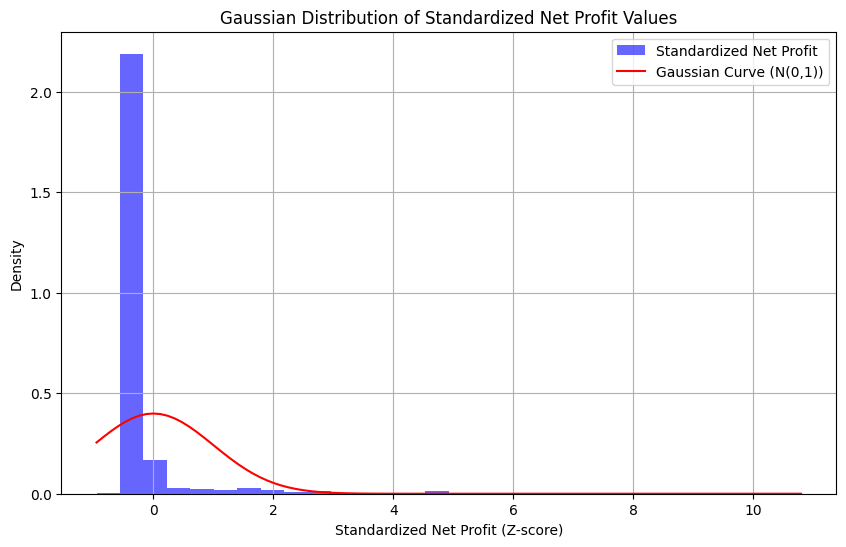

In [1]:
#Z-Score Gaussian 

import json
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load JSON data
file_path = "quarterly_data.json"  # Change this to the correct file path
with open(file_path, "r") as file:
    data = json.load(file)

# Extract Net Profit/(Loss) values for all companies
net_profit_data = data["Quarterly"].get("Net profit/(loss) for the period", {})

# Flatten values into a single list, ignoring missing values
net_profit_values = []
for company, values in net_profit_data.items():
    net_profit_values.extend([v for v in values if isinstance(v, (int, float))])  # Ignore non-numeric data

# Convert to numpy array for standardization
net_profit_values = np.array(net_profit_values)

# Standardize using Z-score
mean_profit = np.mean(net_profit_values)
std_profit = np.std(net_profit_values)
z_scores = (net_profit_values - mean_profit) / std_profit

# Plot histogram of standardized values
plt.figure(figsize=(10, 6))
plt.hist(z_scores, bins=30, density=True, alpha=0.6, color='blue', label="Standardized Net Profit")

# Overlay Gaussian curve
x = np.linspace(min(z_scores), max(z_scores), 100)
gaussian_curve = stats.norm.pdf(x, 0, 1)  # Standard Normal Distribution
plt.plot(x, gaussian_curve, 'r', label="Gaussian Curve (N(0,1))")

# Labels and title
plt.xlabel("Standardized Net Profit (Z-score)")
plt.ylabel("Density")
plt.title("Gaussian Distribution of Standardized Net Profit Values")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


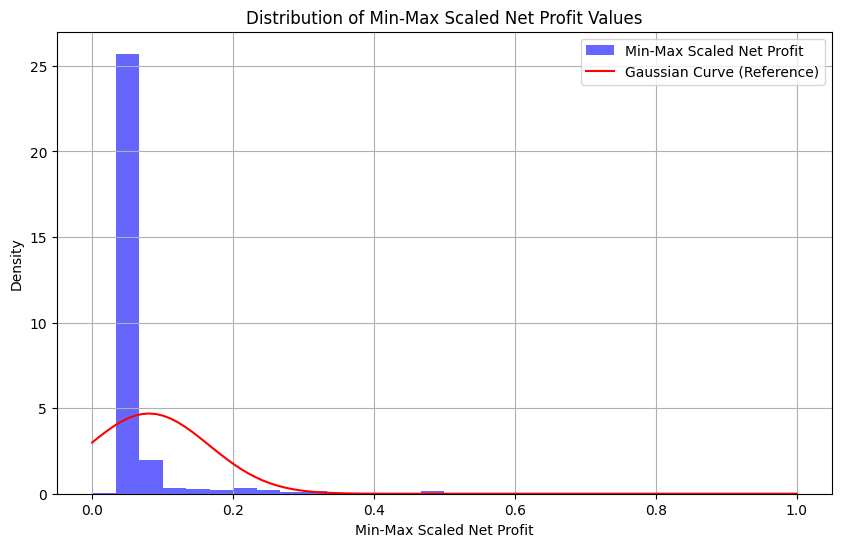

In [2]:
#Min-Max Gaussian

import json
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load JSON data
file_path = "quarterly_data.json"  # Change this to the correct file path
with open(file_path, "r") as file:
    data = json.load(file)

# Extract Net Profit/(Loss) values for all companies
net_profit_data = data["Quarterly"].get("Net profit/(loss) for the period", {})

# Flatten values into a single list, ignoring missing values
net_profit_values = []
for company, values in net_profit_data.items():
    net_profit_values.extend([v for v in values if isinstance(v, (int, float))])  # Ignore non-numeric data

# Convert to numpy array for scaling
net_profit_values = np.array(net_profit_values)

# Apply Min-Max Scaling
min_profit = np.min(net_profit_values)
max_profit = np.max(net_profit_values)
min_max_scaled = (net_profit_values - min_profit) / (max_profit - min_profit)

# Plot histogram of Min-Max Scaled values
plt.figure(figsize=(10, 6))
plt.hist(min_max_scaled, bins=30, density=True, alpha=0.6, color='blue', label="Min-Max Scaled Net Profit")

# Overlay Gaussian curve (for reference, although Min-Max doesn't assume normality)
x = np.linspace(min(min_max_scaled), max(min_max_scaled), 100)
gaussian_curve = stats.norm.pdf(x, np.mean(min_max_scaled), np.std(min_max_scaled))
plt.plot(x, gaussian_curve, 'r', label="Gaussian Curve (Reference)")

# Labels and title
plt.xlabel("Min-Max Scaled Net Profit")
plt.ylabel("Density")
plt.title("Distribution of Min-Max Scaled Net Profit Values")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


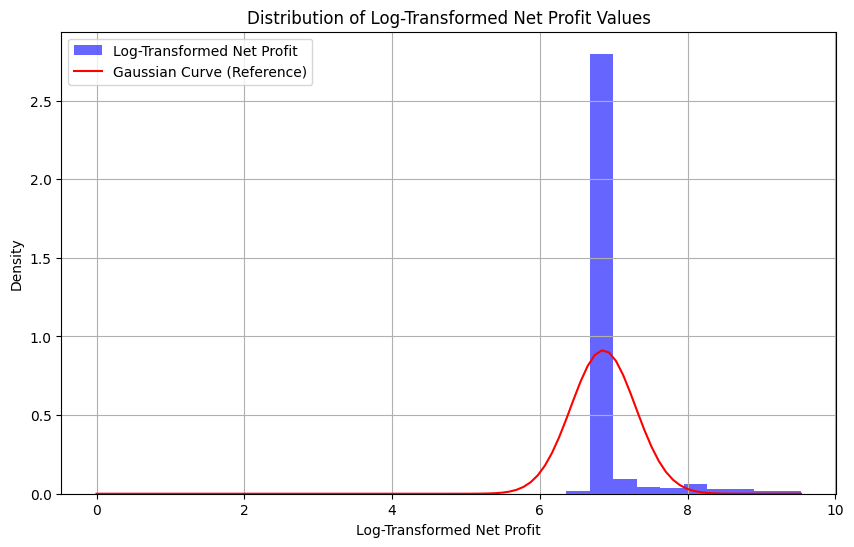

In [3]:
#Log Transformation

import json
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load JSON data
file_path = "quarterly_data.json"  # Change this to the correct file path
with open(file_path, "r") as file:
    data = json.load(file)

# Extract Net Profit/(Loss) values for all companies
net_profit_data = data["Quarterly"].get("Net profit/(loss) for the period", {})

# Flatten values into a single list, ignoring missing or non-numeric values
net_profit_values = []
for company, values in net_profit_data.items():
    net_profit_values.extend([v for v in values if isinstance(v, (int, float))])  

# Convert to numpy array
net_profit_values = np.array(net_profit_values)

# Apply log transformation (handle negative values separately)
shift = abs(min(net_profit_values)) + 1  # Shift to make all values positive
log_transformed = np.log(net_profit_values + shift)  # Apply log transformation

# Plot histogram of log-transformed values
plt.figure(figsize=(10, 6))
plt.hist(log_transformed, bins=30, density=True, alpha=0.6, color='blue', label="Log-Transformed Net Profit")

# Overlay Gaussian curve for reference
x = np.linspace(min(log_transformed), max(log_transformed), 100)
gaussian_curve = stats.norm.pdf(x, np.mean(log_transformed), np.std(log_transformed))  
plt.plot(x, gaussian_curve, 'r', label="Gaussian Curve (Reference)")

# Labels and title
plt.xlabel("Log-Transformed Net Profit")
plt.ylabel("Density")
plt.title("Distribution of Log-Transformed Net Profit Values")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


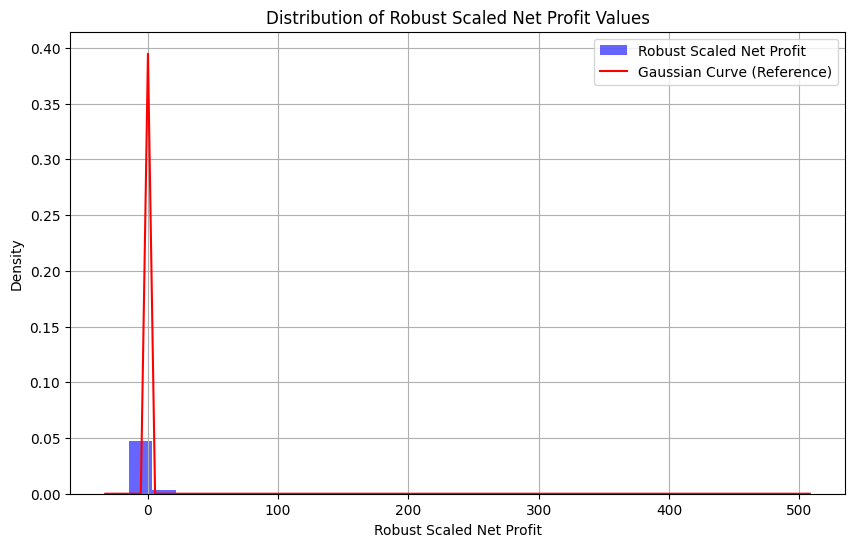

In [4]:
#Robust Scaling

import json
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import RobustScaler

# Load JSON data
file_path = "quarterly_data.json"  # Change this to the correct file path
with open(file_path, "r") as file:
    data = json.load(file)

# Extract Net Profit/(Loss) values for all companies
net_profit_data = data["Quarterly"].get("Net profit/(loss) for the period", {})

# Flatten values into a single list, ignoring missing values
net_profit_values = []
for company, values in net_profit_data.items():
    net_profit_values.extend([v for v in values if isinstance(v, (int, float))])  # Ignore non-numeric data

# Convert to numpy array
net_profit_values = np.array(net_profit_values).reshape(-1, 1)  # Reshape for sklearn

# Apply Robust Scaling
scaler = RobustScaler()
robust_scaled_values = scaler.fit_transform(net_profit_values).flatten()  # Convert back to 1D

# Plot histogram of robust-scaled values
plt.figure(figsize=(10, 6))
plt.hist(robust_scaled_values, bins=30, density=True, alpha=0.6, color='blue', label="Robust Scaled Net Profit")

# Overlay Gaussian curve
x = np.linspace(min(robust_scaled_values), max(robust_scaled_values), 100)
gaussian_curve = stats.norm.pdf(x, 0, 1)  # Standard Normal Distribution
plt.plot(x, gaussian_curve, 'r', label="Gaussian Curve (Reference)")

# Labels and title
plt.xlabel("Robust Scaled Net Profit")
plt.ylabel("Density")
plt.title("Distribution of Robust Scaled Net Profit Values")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


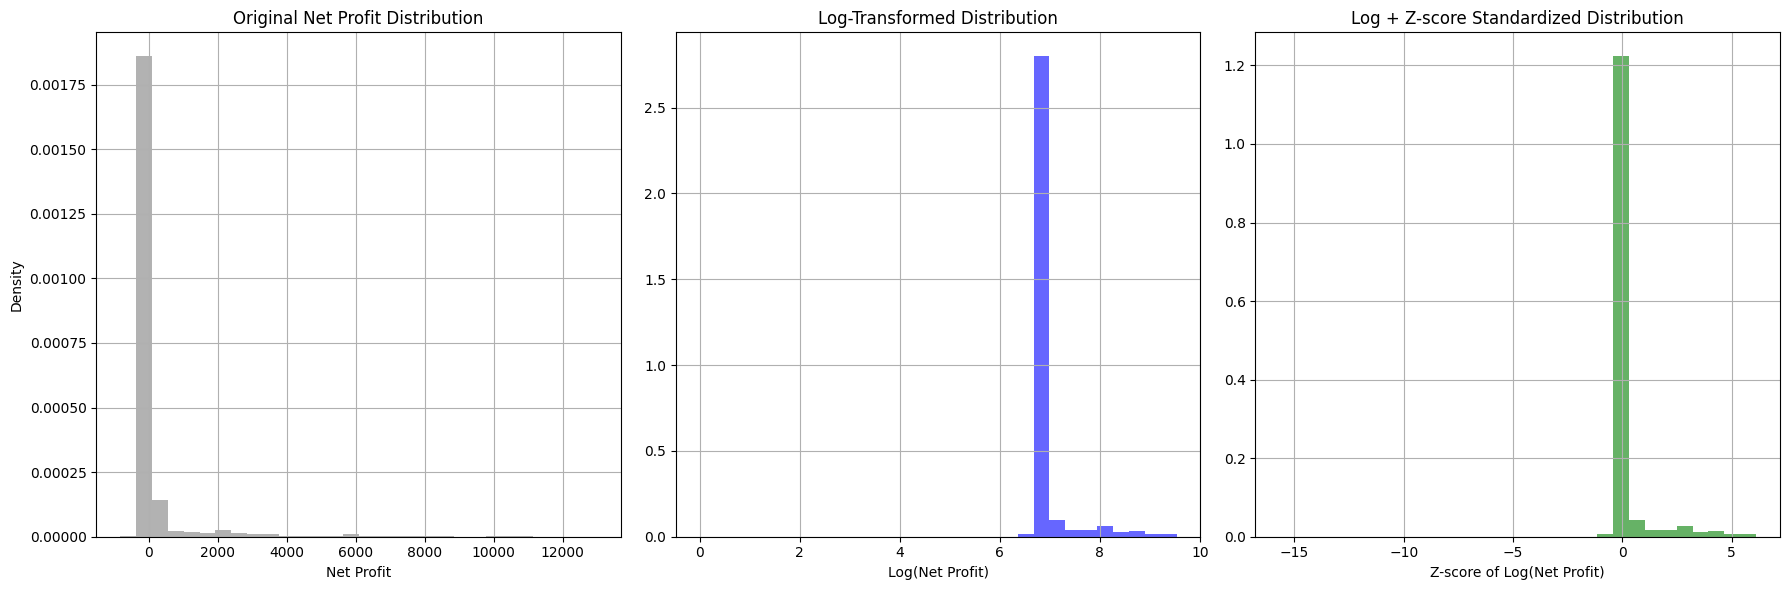

In [2]:
#Log + Zscore

# #1
# import json
# import numpy as np
# import matplotlib.pyplot as plt
# import scipy.stats as stats
# from scipy.stats import zscore

# # Load JSON data
# file_path = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Data\quarterly_data.json"  # Change this to the correct file path
# with open(file_path, "r") as file:
#     data = json.load(file)

# # Extract Net Profit/(Loss) values for all companies
# net_profit_data = data["Quarterly"].get("Net profit/(loss) for the period", {})

# # Flatten values into a single list, ignoring missing or non-numeric values
# net_profit_values = []
# for company, values in net_profit_data.items():
#     net_profit_values.extend([v for v in values if isinstance(v, (int, float))])

# # Convert to numpy array
# net_profit_values = np.array(net_profit_values)

# # Apply log transformation (handle negative values separately)
# shift = abs(min(net_profit_values)) + 1  # Shift to make all values positive
# log_transformed = np.log(net_profit_values + shift)  # Apply log transformation

# # Apply Z-score standardization
# zscore_transformed = zscore(log_transformed)

# # Plot histogram of original values
# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
# plt.hist(log_transformed, bins=30, density=True, alpha=0.6, color='blue', label="Log-Transformed")
# plt.xlabel("Log-Transformed Net Profit")
# plt.ylabel("Density")
# plt.title("Log-Transformed Net Profit Distribution")
# plt.legend()
# plt.grid(True)

# # Plot histogram of Z-score standardized values
# plt.subplot(1, 2, 2)
# plt.hist(zscore_transformed, bins=30, density=True, alpha=0.6, color='green', label="Z-score Transformed")
# plt.xlabel("Z-score Standardized Net Profit")
# plt.ylabel("Density")
# plt.title("Z-score Standardized Net Profit Distribution")
# plt.legend()
# plt.grid(True)

# plt.tight_layout()
# plt.show()

#2
import json
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import zscore

# Load JSON data
file_path = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Data\quarterly_data.json"  # Update path if needed
with open(file_path, "r") as file:
    data = json.load(file)

# Extract Net Profit/(Loss) values for all companies
net_profit_data = data["Quarterly"].get("Net profit/(loss) for the period", {})

# Flatten values into a single list, ignoring missing or non-numeric values
net_profit_values = []
for company, values in net_profit_data.items():
    net_profit_values.extend([v for v in values if isinstance(v, (int, float))])  

# Convert to numpy array
net_profit_values = np.array(net_profit_values)

# Apply log transformation (handle negative values separately)
shift = abs(min(net_profit_values)) + 1  # Shift to make all values positive
log_transformed = np.log(net_profit_values + shift)  # Apply log transformation

# Apply Z-score standardization
zscore_transformed = zscore(log_transformed)

# Plot original vs transformed histograms
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Original data histogram
axs[0].hist(net_profit_values, bins=30, density=True, alpha=0.6, color='gray', label="Original Data")
axs[0].set_title("Original Net Profit Distribution")
axs[0].set_xlabel("Net Profit")
axs[0].set_ylabel("Density")
axs[0].grid(True)

# Log-transformed histogram
axs[1].hist(log_transformed, bins=30, density=True, alpha=0.6, color='blue', label="Log-Transformed Data")
axs[1].set_title("Log-Transformed Distribution")
axs[1].set_xlabel("Log(Net Profit)")
axs[1].grid(True)

# Z-score transformed histogram
axs[2].hist(zscore_transformed, bins=30, density=True, alpha=0.6, color='green', label="Z-score Standardized Data")
axs[2].set_title("Log + Z-score Standardized Distribution")
axs[2].set_xlabel("Z-score of Log(Net Profit)")
axs[2].grid(True)

# Show plots
plt.tight_layout()
plt.show()
